In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
p = sns.color_palette()

os.listdir('/Users/mdeguzman827/Desktop/Cancer')

['.DS_Store',
 '.ipynb_checkpoints',
 'Cancer.ipynb',
 'sample-images',
 'stage1_sample_submission.csv']

In [9]:
import dicom

In [11]:
def dicom_to_image(filename):
    dcm = dicom.read_file(filename)
    img = dcm.pixel_array
    img[img == -2000] = 0
    return img

In [19]:
# files = glob.glob('/Users/mdeguzman827/Desktop/Cancer/sample-images/*/*.dcm')

# f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
# for i in range(20):
#     plots[i // 5, i % 5].axis('off')
#     plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

In [20]:
def get_slice_location(dcm):
    return float(dcm[0x0020, 0x1041].value)

# Returns a list of images for that patient_id, in ascending order of Slice Location
def load_patient(patient_id):
    files = glob.glob('/Users/mdeguzman827/Desktop/Cancer/sample-images/{}/*.dcm'.format(patient_id))
    imgs = {}
    for f in files:
        dcm = dicom.read_file(f)
        img = dcm.pixel_array
        img[img == -2000] = 0
        sl = get_slice_location(dcm)
        imgs[sl] = img
        
    # Not a very elegant way to do this
    sorted_imgs = [x[1] for x in sorted(imgs.items(), key=lambda x: x[0])]
    return sorted_imgs

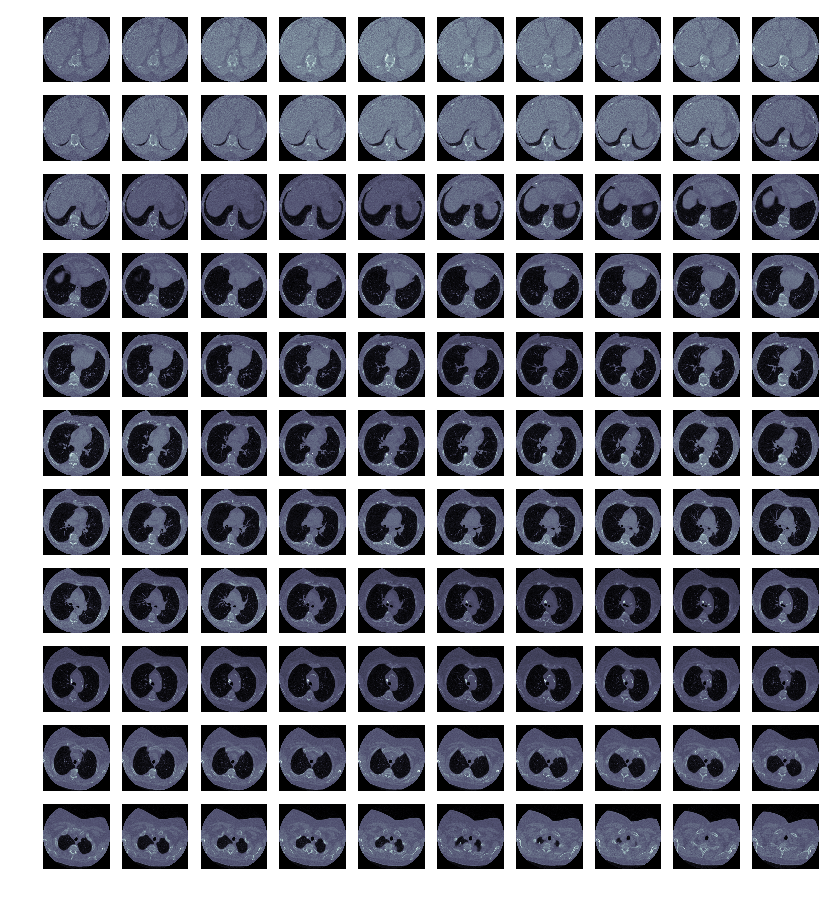

In [22]:
pat = load_patient('0a38e7597ca26f9374f8ea2770ba870d')
f, plots = plt.subplots(11, 10, sharex='all', sharey='all', figsize=(10, 11))
# matplotlib is drunk
#plt.title('Sorted Slices of Patient 0a38e7597ca26f9374f8ea2770ba870d - No cancer')
for i in range(110):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

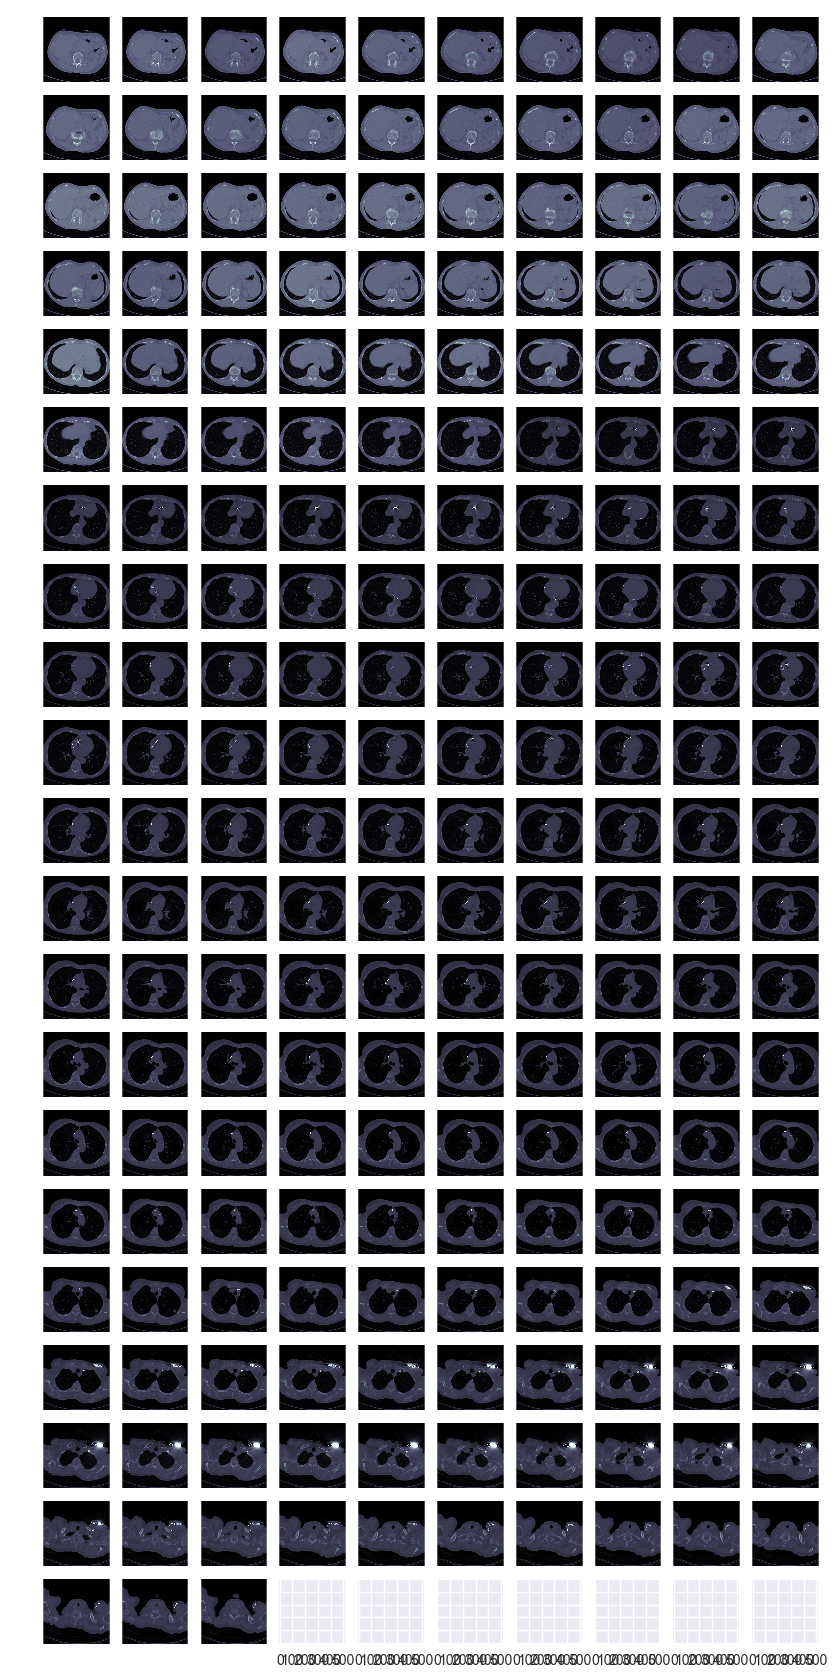

In [21]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')
f, plots = plt.subplots(21, 10, sharex='all', sharey='all', figsize=(10, 21))
for i in range(203):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

ValueError: Cannot save animation: no writers are available. Please install mencoder or ffmpeg to save animations.

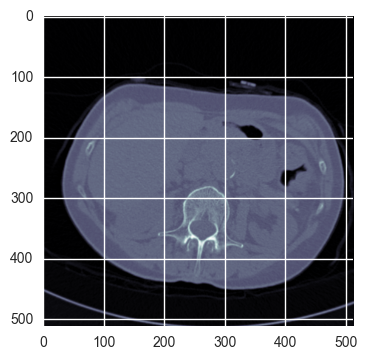

In [36]:
pat = load_patient('0acbebb8d463b4b9ca88cf38431aac69')

import matplotlib.animation as animation
def animate(pat, gifname):
    # Based on @Zombie's code
    fig = plt.figure()
    anim = plt.imshow(pat[0], cmap=plt.cm.bone)
    def update(i):
        anim.set_array(pat[i])
        return anim,
    
    a = animation.FuncAnimation(fig, update, frames=range(len(pat)), interval=50, blit=True)
    a.save(gifname, writer='imagemagick')
    
animate(pat, 'test.gif')

In [33]:
IMG_TAG = """<img src="data:image/gif;base64,{0}">"""

import base64
from IPython.display import HTML

def display_gif(fname):
    data = open(fname, "rb").read()
    data = base64.b64encode(data)
    return HTML(IMG_TAG.format(data))

display_gif("test.gif")

IOError: [Errno 2] No such file or directory: 'test.gif'